<h1> Install Packages </h1>

In [1]:
!pip install tensorflow
!pip install numpy
!pip install -U imbalanced-learn
!pip install pandas
!pip install scikit-learn
!pip install imbalanced-learn
!pip install keras-tuner

DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author

<h1> Import Packages </h1>

In [2]:
import pandas as pd
import numpy as np
import imblearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

2024-03-31 12:58:32.483364: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 12:58:32.483434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 12:58:32.484580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 12:58:32.492074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 12:58:33.362137: W tensorflow/compiler/tf2

<h1> Inspect Dataset (Before ROS) </h1>

In [3]:
final_df = pd.read_csv('../merged_df.csv')
final_df.drop('Unnamed: 0', axis='columns', inplace=True)
final_df.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,8,Crema\1015_IEO_ANG_HI.wav,-274.081064,90.553742,-1.319409,28.355147,-3.295721,4.588043,-4.467366,6.737204,...,0.000086,0.000085,0.000080,0.000078,-0.016402,-0.013311,-0.054505,0.011296,0.012550,0.009563
1,12,Crema\1062_IWL_HAP_XX.wav,-282.730691,71.540738,34.301680,11.759998,2.890566,-2.018548,-3.562313,-3.235804,...,0.000976,0.000892,0.000916,0.000897,0.041275,0.032079,0.008832,-0.025359,0.013441,0.032247
2,5,Crema\1028_ITS_NEU_XX.wav,-391.468786,86.299907,44.825176,37.441880,12.426751,7.889423,0.606896,2.038279,...,0.000043,0.000041,0.000043,0.000041,-0.005835,0.003289,-0.048369,-0.063204,0.011831,0.009074
3,4,Tess\OAF_happy\OAF_kick_happy.wav,-471.930760,63.462643,13.026071,7.454551,7.756898,-2.243907,-15.625067,3.636577,...,0.000437,0.000529,0.000278,0.000023,-0.005725,0.030310,-0.053869,-0.018939,-0.024129,-0.016006
4,8,Crema\1085_IEO_ANG_LO.wav,-325.833235,65.936750,17.097764,19.950584,-0.243021,13.107857,4.477988,0.751412,...,0.000144,0.000141,0.000145,0.000145,-0.008370,-0.026442,-0.042298,0.055370,-0.000482,0.018563


# Shuffle Dataset

In [4]:
final_df = shuffle(final_df)
final_df

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
19676,0,Tess\OAF_angry\OAF_check_angry.wav,-376.263100,39.303110,-11.678464,-5.319931,-2.319511,1.300150,-19.199215,-4.798609,...,4.554351e-04,4.918458e-04,2.307021e-04,1.816828e-05,-0.021761,-0.033171,0.007202,0.039576,0.004851,-0.014936
17149,10,Crema\1026_MTI_DIS_XX.wav,-348.226960,93.695170,34.532862,32.007245,1.327001,0.411590,-3.127864,-3.441665,...,6.605353e-05,6.458859e-05,6.055055e-05,6.556830e-05,0.033608,0.002081,-0.098764,-0.058121,-0.013643,0.001762
15895,3,Crema\1020_TIE_FEA_XX.wav,-433.456700,126.657500,26.963558,51.705600,1.885986,23.311152,-13.897490,7.106283,...,1.778796e-09,1.731973e-09,1.701179e-09,1.682359e-09,-0.001370,-0.001554,-0.088800,0.004504,0.008899,0.005516
14979,7,Tess\YAF_pleasant_surprised\YAF_jail_ps.wav,-348.514950,35.539932,-7.273381,-6.475181,-16.195774,-9.332032,-17.269629,-9.390345,...,4.027385e-03,4.731249e-03,3.277052e-03,3.935492e-04,0.030832,-0.016283,0.000626,-0.027964,0.018812,0.020746
4343,7,Tess\YAF_pleasant_surprised\YAF_mood_ps.wav,-369.772950,53.583595,-10.218364,10.065078,-9.219285,-4.909666,-8.973171,-17.778660,...,2.317373e-03,1.759366e-03,2.272658e-03,2.743173e-04,-0.056564,-0.043111,0.021608,0.010367,-0.024212,-0.018241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23295,5,Crema\1043_WSI_NEU_XX.wav,-314.224227,61.199561,31.025647,19.430728,8.725793,6.669510,2.325029,-4.161004,...,4.999651e-04,4.917573e-04,4.887836e-04,4.772662e-04,0.006016,-0.014191,-0.048907,-0.006516,0.020421,-0.010896
22989,5,Tess\YAF_neutral\YAF_cool_neutral.wav,-417.931730,76.264114,6.882710,22.384514,-8.289508,-6.893897,6.981189,-17.841164,...,2.780941e-04,3.912785e-04,3.793584e-04,2.446385e-05,0.016446,0.132350,0.231897,0.100811,-0.003346,-0.080307
13082,8,Crema\1014_IWL_ANG_XX.wav,-296.020720,126.772310,-13.879251,43.832140,-14.738029,3.437249,-6.800799,10.507653,...,1.792012e-09,1.758602e-09,1.737136e-09,1.723752e-09,-0.048225,-0.041090,-0.069443,-0.009493,-0.002305,0.005119
2863,11,Crema\1019_IWL_FEA_XX.wav,-359.740570,153.130770,3.045519,46.834583,-20.415047,9.525958,-12.531959,5.296240,...,1.268279e-08,1.241921e-08,1.224807e-08,1.214242e-08,0.025895,-0.003127,-0.067052,-0.001275,-0.002638,-0.026640


<h1> Sanitise Dataset (Target = Emotions with Gender) </h1>

In [5]:
final_df_testing = final_df.copy()

X = final_df_testing.drop(columns=['Path', 'Emotions'], axis=1)
y = final_df_testing['Emotions']
print(X.shape, y.shape)

(23364, 173) (23364,)


<h1> ros </h1>

In [6]:
ros = RandomOverSampler(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_ros_train))

Original dataset shape Counter({2: 1779, 0: 1761, 6: 1745, 4: 1731, 3: 1722, 5: 1527, 12: 1264, 11: 1255, 14: 1227, 10: 1218, 8: 1208, 13: 1010, 7: 784, 15: 161, 9: 155, 1: 144})


Resample dataset shape Counter({12: 1779, 6: 1779, 3: 1779, 10: 1779, 4: 1779, 8: 1779, 0: 1779, 11: 1779, 5: 1779, 2: 1779, 13: 1779, 1: 1779, 15: 1779, 7: 1779, 14: 1779, 9: 1779})


In [7]:
X_train

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
4108,-360.677950,120.608925,7.980934,47.916832,1.409560,9.932250,-15.468286,6.559651,-15.383774,0.883437,...,2.323828e-08,2.283901e-08,2.258320e-08,2.242366e-08,-0.020785,-0.021399,-0.088523,-0.026425,0.010955,0.006279
16634,-409.510740,71.886530,26.994408,31.270096,1.695575,9.776866,-1.919779,-15.560260,-0.864257,-4.957705,...,3.667513e-03,4.768950e-03,2.494970e-03,1.718786e-04,-0.050911,0.130983,-0.043984,0.106354,-0.009662,-0.019394
22289,-284.423651,19.594523,-4.944293,6.030833,-4.771820,-10.565434,-2.759192,-4.997394,-4.874655,-4.933069,...,3.386712e-03,5.370742e-03,5.857560e-03,1.124152e-03,-0.030387,0.005274,-0.002979,-0.009726,0.009635,0.010327
9625,-423.323800,139.816070,7.589283,53.472210,-14.032085,26.539894,-11.955317,13.659168,-13.358387,2.606194,...,1.927492e-09,1.892579e-09,1.870093e-09,1.856096e-09,-0.014865,0.004357,-0.082843,-0.043004,0.021004,-0.007004
11301,-363.052580,129.662120,11.420609,53.042780,-17.032701,12.064724,-16.076336,5.233377,-13.400884,2.052367,...,1.880267e-12,1.816252e-12,1.778438e-12,1.724295e-12,0.008308,-0.003453,-0.047044,-0.049715,0.019875,0.000306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,-412.457000,40.030920,8.426276,9.412962,1.809443,0.573026,-14.351509,-11.782706,-9.585588,-6.598010,...,2.371951e-03,3.319779e-03,2.819077e-03,3.614609e-04,0.015803,0.007083,-0.027585,-0.008734,0.004594,-0.008505
22400,-299.961231,47.336741,11.745687,0.670017,1.272671,-1.449562,-8.426728,-7.451516,-8.235756,-12.376843,...,8.968774e-04,8.525150e-04,7.673966e-04,6.024876e-04,-0.040513,-0.025413,-0.055600,-0.019677,-0.011607,0.009967
19536,-418.207340,121.438320,11.266514,64.172386,-7.414514,30.696985,-18.467280,11.827283,-10.477240,5.870705,...,1.571948e-09,1.546417e-09,1.530165e-09,1.520024e-09,-0.001319,-0.025594,-0.056688,-0.017791,0.006780,-0.004959
16301,-465.681180,78.510440,27.189947,2.539805,4.480752,-0.306248,-6.269993,-4.537312,-20.824100,-6.152972,...,4.673866e-04,3.672182e-04,1.779672e-04,1.463732e-05,-0.010087,0.018009,-0.033258,0.024088,0.005107,-0.004253


<h1> Model Building and Model Tuning </h1>

In [8]:
def model_builder(hp):
    model = tf.keras.Sequential()
    

    model.add(layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=256, max_value=512, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[5]),
        strides=1, padding="same", activation="relu",
        input_shape=(X_ros_train.shape[1], 1)
    ))

    model.add(layers.Conv1D(
            filters=hp.Int('conv_2_filter', min_value=128, max_value=256, step=32),
            kernel_size=hp.Choice('conv_2_kernel', values=[5]),
            strides=1, padding="same", activation="relu"
        ))

    model.add(layers.Conv1D(
            filters=hp.Int('conv_3_filter', min_value=64, max_value=128, step=32),
            kernel_size=hp.Choice('conv_3_kernel', values=[5]),
            strides=1, padding="same", activation="relu"
        ))

    model.add(layers.Conv1D(
            filters=hp.Int('conv_4_filter', min_value=32, max_value=64, step=32),
            kernel_size=hp.Choice('conv_4_kernel', values=[5]),
            strides=1, padding="same", activation="relu"
        ))
    
    
    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(units=hp.Int('dense_1_units', min_value=256, max_value=512, step=16), activation='relu'))
    model.add(layers.Dense(units=hp.Int('dense_2_units', min_value=128, max_value=256, step=16), activation='relu'))
    model.add(layers.Dense(units=hp.Int('dense_3_units', min_value=64, max_value=128, step=16), activation='relu'))
    model.add(layers.Dense(units=hp.Int('dense_4_units', min_value=32, max_value=64, step=16), activation='relu'))
    
    # Output layer
    model.add(layers.Dense(len(np.unique(y_ros_train)), activation='softmax'))
              
    # Compile model
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-4, sampling='log')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        max_trials=100,  # Adjust based on computational resources
                        executions_per_trial=1,  # Adjust based on computational resources
                        directory='model_hyperparameter_tuning_final',
                        project_name='audio_classification')

tuner.search(X_ros_train, y_ros_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=5)])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Create the model with the best hyperparameters
model = model_builder(best_hps)
model.summary()

Trial 100 Complete [00h 02m 13s]
val_accuracy: 0.9947303533554077

Best val_accuracy So Far: 0.9987704157829285
Total elapsed time: 04h 34m 07s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 173, 288)          1728      
                                                                 
 conv1d_5 (Conv1D)           (None, 173, 192)          276672    
                                                                 
 conv1d_6 (Conv1D)           (None, 173, 96)           92256     
                                                                 
 conv1d_7 (Conv1D)           (None, 173, 32)           15392     
                                                                 
 flatten_1 (Flatten)         (None, 5536)              0         
                                                                 
 dense_5 (Dense)             (None, 480)  

# Parameters vs Accuracy

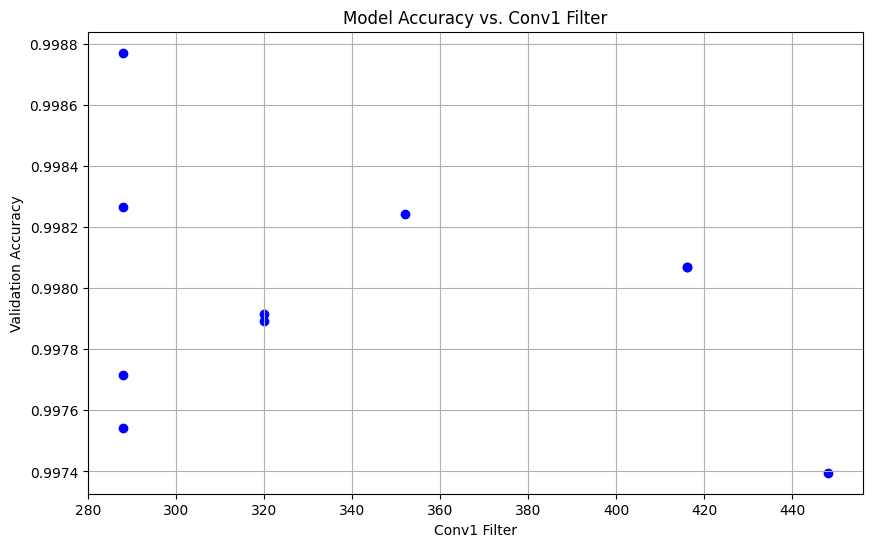

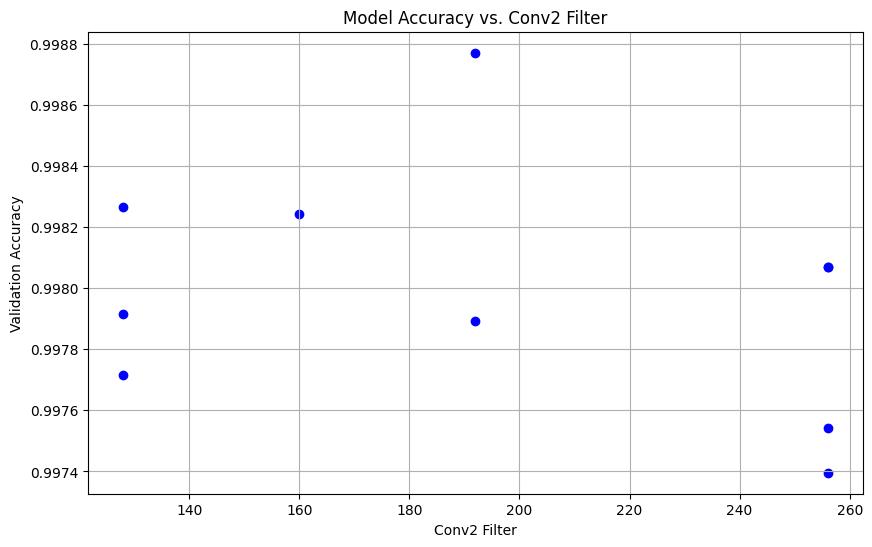

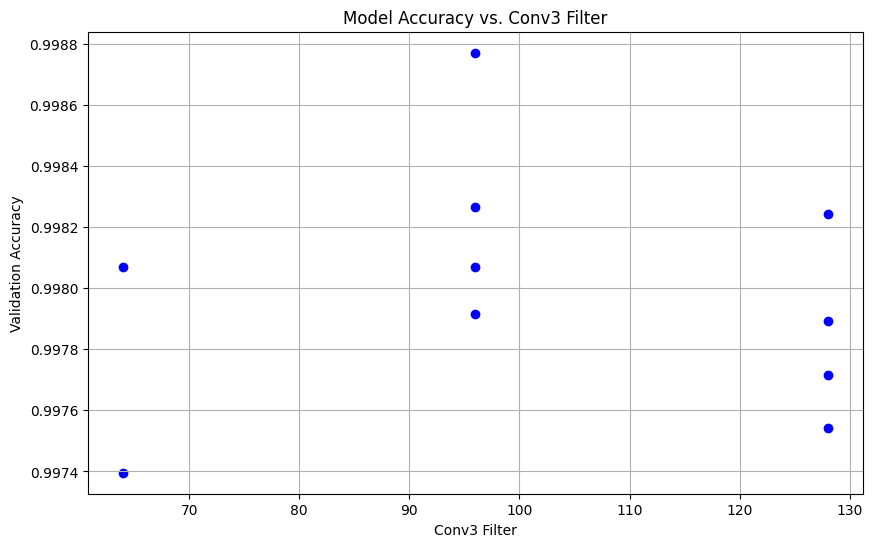

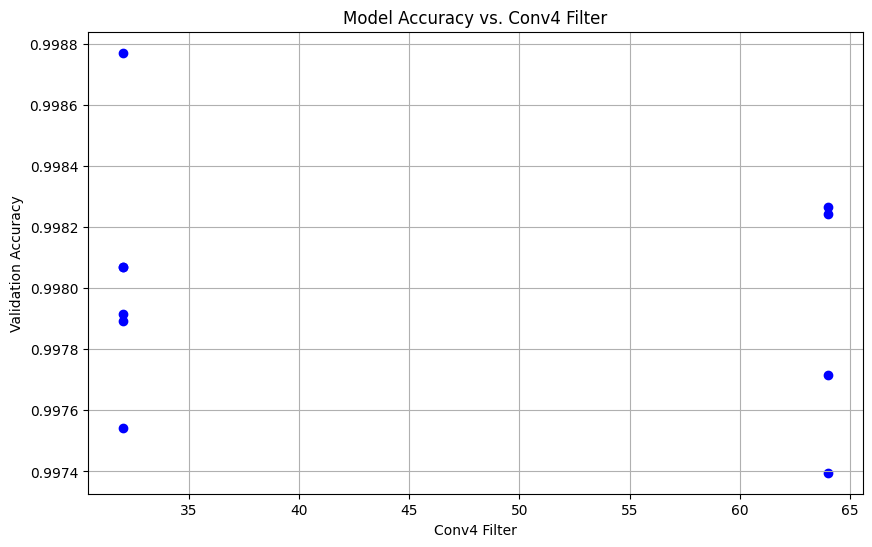

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the tuner has finished searching
trials = tuner.oracle.get_best_trials(num_trials=10)

# Initialize lists to store hyperparameters and their corresponding accuracies
conv_1_filters = []
conv_2_filters = []
conv_3_filters = []
conv_4_filters = []
val_accuracies = []

# Loop through trials to collect data
for trial in trials:
    conv_1_filters.append(trial.hyperparameters.get('conv_1_filter'))
    conv_2_filters.append(trial.hyperparameters.get('conv_2_filter'))
    conv_3_filters.append(trial.hyperparameters.get('conv_3_filter'))
    conv_4_filters.append(trial.hyperparameters.get('conv_4_filter'))
    val_accuracies.append(trial.score)

# Example plot: Accuracy vs. conv_1_filters
# This assumes you're interested in plotting the relationship between the first convolutional layer's filters and accuracy.
plt.figure(figsize=(10, 6))
plt.scatter(conv_1_filters, val_accuracies, color='blue')
plt.title('Model Accuracy vs. Conv1 Filter')
plt.xlabel('Conv1 Filter')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(conv_2_filters, val_accuracies, color='blue')
plt.title('Model Accuracy vs. Conv2 Filter')
plt.xlabel('Conv2 Filter')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(conv_3_filters, val_accuracies, color='blue')
plt.title('Model Accuracy vs. Conv3 Filter')
plt.xlabel('Conv3 Filter')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(conv_4_filters, val_accuracies, color='blue')
plt.title('Model Accuracy vs. Conv4 Filter')
plt.xlabel('Conv4 Filter')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()


<h1> Train on Best Hyperparameter (with Validation Split) to compare with untuned CNN model </h1>

In [31]:
# Regularisation - Define early stopping callback 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

epochs = 100

history_final = model.fit(X_ros_train, y_ros_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping]) 
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
712/712 [==============================] - 3s 4ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.0111 - val_accuracy: 0.9977
Epoch 2/100
712/712 [==============================] - 3s 4ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0090 - val_accuracy: 0.9981
Epoch 3/100
712/712 [==============================] - 3s 4ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 2.7551e-04 - val_accuracy: 1.0000
Epoch 4/100
712/712 [==============================] - 3s 4ms/step - loss: 0.0164 - accuracy: 0.9967 - val_loss: 0.0064 - val_accuracy: 0.9968
Epoch 5/100
712/712 [==============================] - 3s 4ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.3151e-04 - val_accuracy: 1.0000
Epoch 6/100
712/712 [==============================] - 3s 4ms/step - loss: 6.8399e-04 - accuracy: 0.9998 - val_loss: 9.2630e-05 - val_accuracy: 1.0000
Epoch 7/100
712/712 [==============================] - 3s 4ms/step - loss: 9.0453e-04 - accuracy: 0.9998 - val_loss: 8.7308e-0

<h1> Train on Best Hyperparameter (without Validation Split) </h1>

In [32]:
# Regularisation - Define early stopping callback 
early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1)

epochs = 100

history_final = model.fit(X_ros_train, y_ros_train, epochs=epochs, callbacks=[early_stopping]) 
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0067 - accuracy: 0.9983
Epoch 2/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0097 - accuracy: 0.9974
Epoch 3/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0040 - accuracy: 0.9988
Epoch 4/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 5/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 6/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0115 - accuracy: 0.9966
Epoch 7/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 8/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 9/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0026 - accuracy: 0.9988
Epoch 10/100
890/890 [==============================] - 3s 4ms/step - loss: 0.0116 - accura

# Save Model

In [37]:
model_name = 'aug_CNN_tao_hyperparameter_tuning_final.keras'

model.save(model_name)

<h1> Visualization of Training Loss/Accuracy Over Epochs </h1>

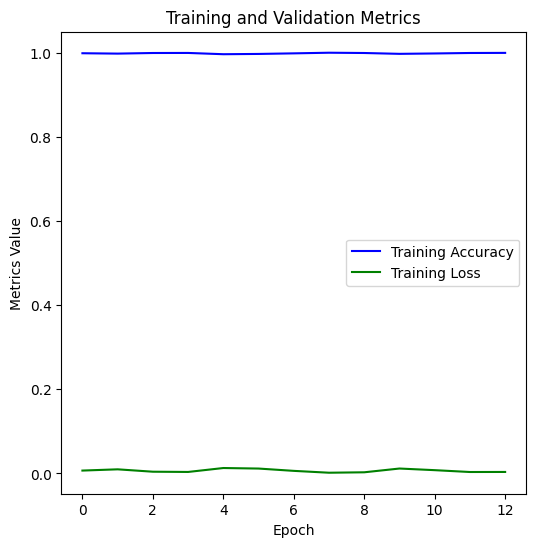

In [38]:
plt.figure(figsize=(6, 6))

# Plot Training Accuracy
plt.plot(history_final.history['accuracy'], label='Training Accuracy', color='blue')

# Plot Training Loss
plt.plot(history_final.history['loss'], label='Training Loss', color='green')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(False)
plt.show()


<h1> Visualization for accuracy, precision, recall and F1-Score </h1>

147/147 [==============================] - 0s 1ms/step


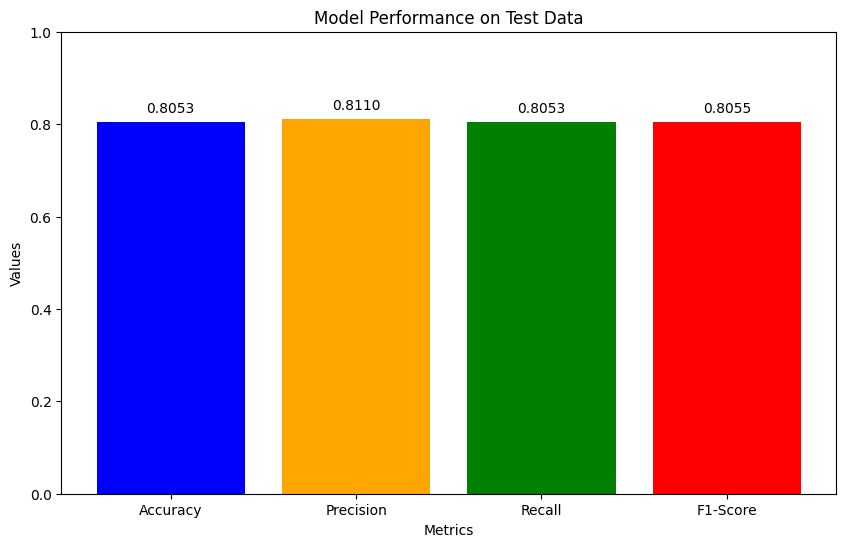

In [39]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance on Test Data')
plt.ylim(0, 1)  # Assuming the metrics are in proportion (0 to 1)
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center')
plt.show()

<h1> Visualization of Confusion Matrix </h1>

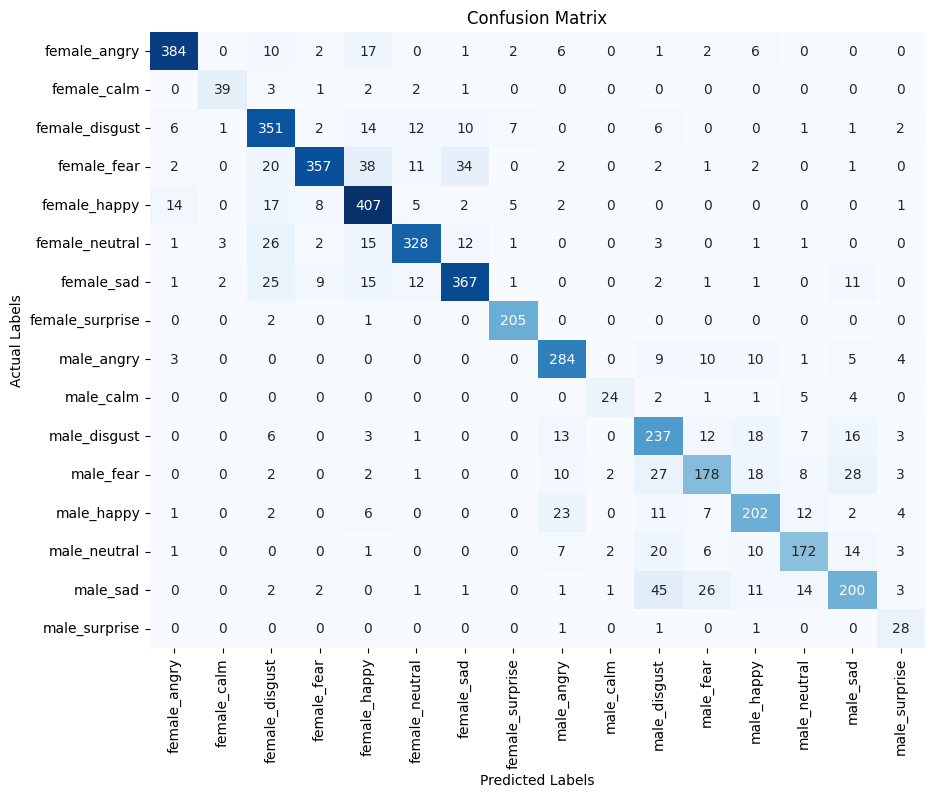

                 precision    recall  f1-score   support

   female_angry       0.93      0.89      0.91       431
    female_calm       0.87      0.81      0.84        48
 female_disgust       0.75      0.85      0.80       413
    female_fear       0.93      0.76      0.84       470
   female_happy       0.78      0.88      0.83       461
 female_neutral       0.88      0.83      0.86       393
     female_sad       0.86      0.82      0.84       447
female_surprise       0.93      0.99      0.96       208
     male_angry       0.81      0.87      0.84       326
      male_calm       0.83      0.65      0.73        37
   male_disgust       0.65      0.75      0.70       316
      male_fear       0.73      0.64      0.68       279
     male_happy       0.72      0.75      0.73       270
   male_neutral       0.78      0.73      0.75       236
       male_sad       0.71      0.65      0.68       307
  male_surprise       0.55      0.90      0.68        31

       accuracy              

In [40]:
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]


cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=class_labels))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>